## Task 8 100DaysOfBytewise - Machine Learning

###  Calculating the mean, median, and mode of the sepal lengths in the Iris dataset.


In [28]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
iris = load_iris()
data  = pd.DataFrame(data=iris.data,  columns=iris.feature_names)
sepal_length_mean = data['sepal length (cm)'].mean()
print('Sepal length mean : ' , sepal_length_mean)

sepal_length_mode = data['sepal length (cm)'].mode()
print('sepal length mode :', sepal_length_mode)

sepal_length_median = data['sepal length (cm)'].median()
print('sepal length median : ', sepal_length_median)


Sepal length mean :  5.843333333333334
sepal length mode : 0    5.0
Name: sepal length (cm), dtype: float64
sepal length median :  5.8


### Calculating the variance and standard deviation of the petal widths in the Iris dataset.


In [29]:
std_petal_width = data['petal width (cm)'].std()
print('standard deviation of petal width : ', std_petal_width)


vars_petal_width = data['petal width (cm)'].var()
print('variance of petal width : ', vars_petal_width)


standard deviation of petal width :  0.7622376689603465
variance of petal width :  0.5810062639821029


###  Creating a summary table that includes the mean, median, variance, and standard deviation for all numerical features in the dataset.



In [30]:
data['species'] = iris.target


data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


summary_table = data.groupby('species').agg({
    'sepal length (cm)': ['mean', 'median', 'var', 'std'],
    'sepal width (cm)': ['mean', 'median', 'var', 'std'],
    'petal length (cm)': ['mean', 'median', 'var', 'std'],
    'petal width (cm)': ['mean', 'median', 'var', 'std'],
})


summary_table['count'] = data['species'].value_counts()


summary_table.columns = ['Mean Sepal Length (cm)', 'Median Sepal Length (cm)', 'Variance Sepal Length (cm)', 'Std Dev Sepal Length (cm)',
                         'Mean Sepal Width (cm)', 'Median Sepal Width (cm)', 'Variance Sepal Width (cm)', 'Std Dev Sepal Width (cm)',
                         'Mean Petal Length (cm)', 'Median Petal Length (cm)', 'Variance Petal Length (cm)', 'Std Dev Petal Length (cm)',
                         'Mean Petal Width (cm)', 'Median Petal Width (cm)', 'Variance Petal Width (cm)', 'Std Dev Petal Width (cm)',
                         'Count']

print(summary_table)

            Mean Sepal Length (cm)  Median Sepal Length (cm)  \
species                                                        
setosa                       5.006                       5.0   
versicolor                   5.936                       5.9   
virginica                    6.588                       6.5   

            Variance Sepal Length (cm)  Std Dev Sepal Length (cm)  \
species                                                             
setosa                        0.124249                   0.352490   
versicolor                    0.266433                   0.516171   
virginica                     0.404343                   0.635880   

            Mean Sepal Width (cm)  Median Sepal Width (cm)  \
species                                                      
setosa                      3.428                      3.4   
versicolor                  2.770                      2.8   
virginica                   2.974                      3.0   

            Variance S

### Defining a random variable for the sepal length and calculate the probability distribution of sepal lengths.


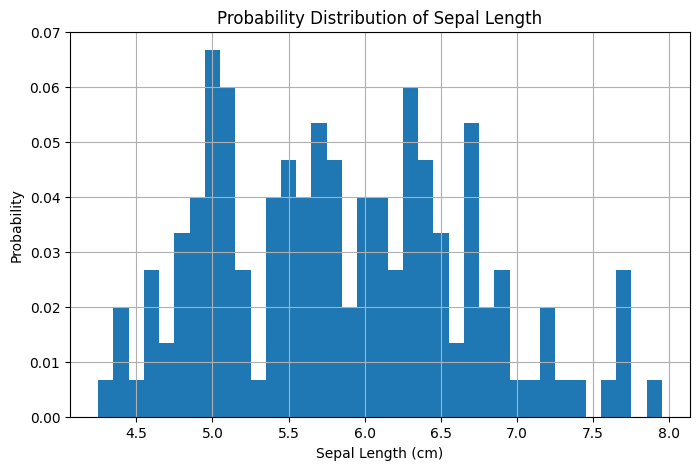

In [31]:
sepal_length = data['sepal length (cm)']
sepal_length_prob = sepal_length.value_counts(normalize=True).sort_index()

plt.figure(figsize=(8,5))
plt.bar(sepal_length_prob.index, sepal_length_prob.values, width=0.1)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sepal Length')
plt.grid(True)
plt.show()

###  Plotting the probability distribution of sepal lengths using a histogram

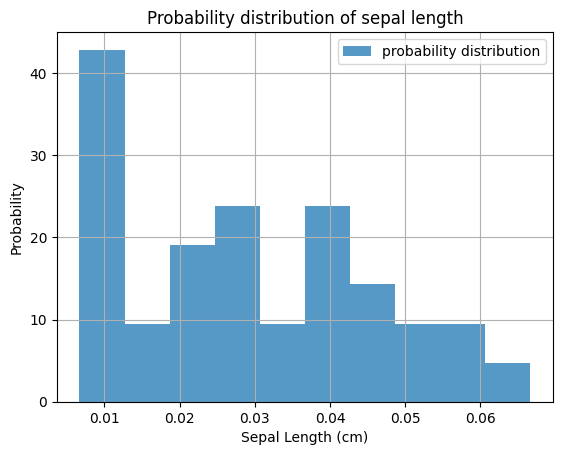

In [32]:
plt.hist(sepal_length_prob, bins=10,density=True, alpha=0.75, label='probability distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability')
plt.title('Probability distribution of sepal length')
plt.grid(True)
plt.legend()
plt.show()

### Calculating the cumulative distribution function (CDF) for the petal lengths and plot it

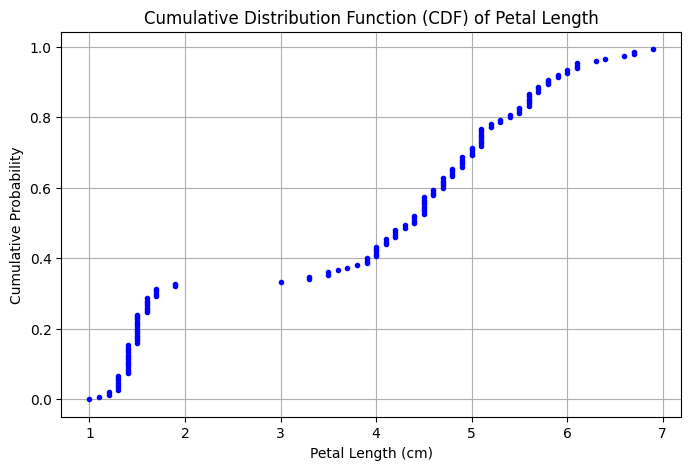

In [33]:
petal_length  = data['petal length (cm)']
sorted_data = np.sort(petal_length)
yvals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.figure(figsize=(8, 5))
plt.plot(sorted_data, yvals, marker='.', linestyle='none', color='b')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Petal Length')
plt.grid(True)
plt.show()

### Calculating and plot the probability density function (PDF) for sepal width.


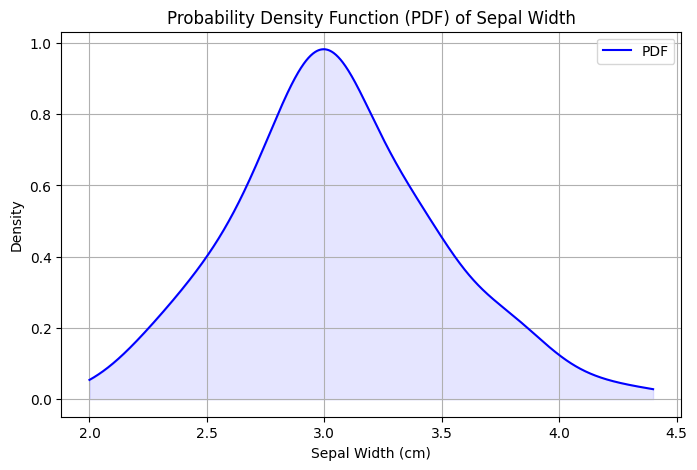

In [34]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)


sepal_width = data['sepal width (cm)']

kde = gaussian_kde(sepal_width)
x_vals = np.linspace(sepal_width.min(), sepal_width.max(), 1000)
pdf_vals = kde.evaluate(x_vals)


plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, color='b', label='PDF')
plt.fill_between(x_vals, pdf_vals, alpha=0.1, color='b')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Sepal Width')
plt.grid(True)
plt.legend()
plt.show()

### Determining the probability of a randomly selected iris flower having a petal length greater than a given value.


In [35]:
petal_length = data['petal length (cm)']


threshold_value = 5.0


probability_greater_than_threshold = (petal_length > threshold_value).mean()

print(f"Probability of a randomly selected iris flower having petal length > {threshold_value}: {probability_greater_than_threshold}")

Probability of a randomly selected iris flower having petal length > 5.0: 0.28


###  Performing a hypothesis test to determine if there is a significant difference in the mean petal length between two species of iris flowers.


In [36]:
from scipy import stats


petal_length = data['petal length (cm)']
species = iris.target


petal_length_versicolor = petal_length[species == 1]  # species 1 is versicolor
petal_length_virginica = petal_length[species == 2]   # species 2 is virginica


t_statistic, p_value = stats.ttest_ind(petal_length_versicolor, petal_length_virginica)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean petal length between versicolor and virginica species.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean petal length between versicolor and virginica species.")


T-statistic: -12.603779441384985
P-value: 3.1788195478061495e-22
Reject the null hypothesis: There is a significant difference in mean petal length between versicolor and virginica species.


### Calculating and interpret the covariance and correlation between sepal length and sepal width.


In [37]:

sepal_length = data['sepal length (cm)']
sepal_width = data['sepal width (cm)']


covariance = np.cov(sepal_length, sepal_width)[0, 1]


correlation = np.corrcoef(sepal_length, sepal_width)[0, 1]

print(f"Covariance between sepal length and sepal width: {covariance}")
print(f"Correlation between sepal length and sepal width: {correlation}")


if correlation > 0:
    print("There is a positive correlation between sepal length and sepal width.")
elif correlation < 0:
    print("There is a negative correlation between sepal length and sepal width.")
else:
    print("There is no linear correlation between sepal length and sepal width.")


Covariance between sepal length and sepal width: -0.0424340044742729
Correlation between sepal length and sepal width: -0.11756978413300198
There is a negative correlation between sepal length and sepal width.
